# Facebook Prophet

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from fbprophet import Prophet
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore")
# Suppress Info messages from Prophet
import logging, sys
logging.disable(sys.maxsize)

### Load the dataset and convert to required format <br>
For Prophet to work the data to be given in dataframe format<br>
Also thee date/time column to be named as 'ds' and the value of it to be named as 'y'

In [3]:
#Load data
df=pd.read_csv('SeaPlaneTravel.csv')
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])
df.head()

,ds,y
0,2003-01-01,112
1,2003-02-01,118
2,2003-03-01,132
3,2003-04-01,129
4,2003-05-01,121


### Plotting the original dataset

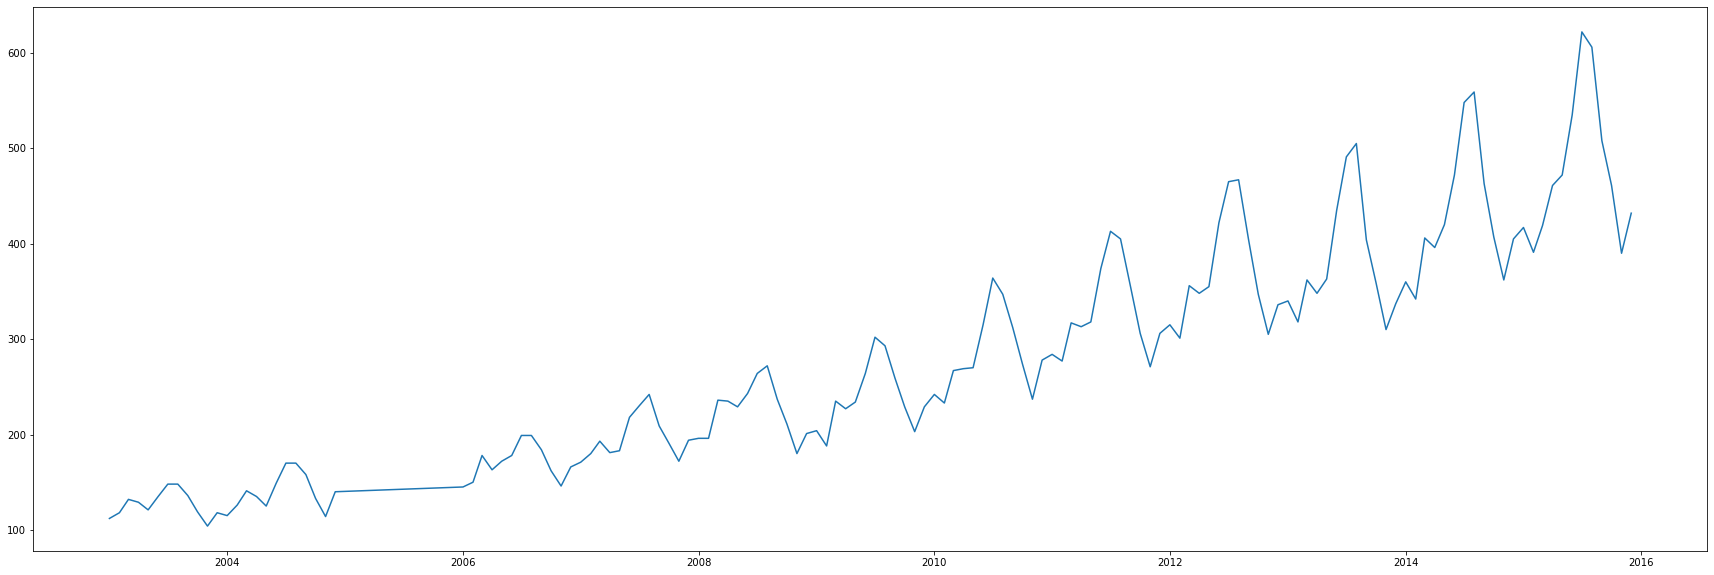

In [4]:
plt.figure(figsize=(30,10))
plt.plot(df.ds,df.y)

### Fitting & Predicting

In [5]:
# define the model
model = Prophet()
# fit the model
model.fit(df)
# Predict
forecast = model.predict(df)
#Predict returns so many columns and here are a few useful ones
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

            ds        yhat  yhat_lower  yhat_upper
0   2003-01-01   87.873742   59.777269  117.062497
1   2003-02-01   81.973460   54.098393  110.657717
2   2003-03-01  103.475331   75.226402  133.402115
3   2003-04-01  106.253469   77.543362  135.008017
4   2003-05-01  113.200060   83.050384  142.267512
..         ...         ...         ...         ...
139 2015-08-01  541.880110  513.421473  568.381927
140 2015-09-01  490.468696  462.150339  519.086922
141 2015-10-01  455.745412  427.075297  486.330030
142 2015-11-01  420.846268  392.489161  450.814022
143 2015-12-01  451.967460  423.989752  479.533889

[144 rows x 4 columns]


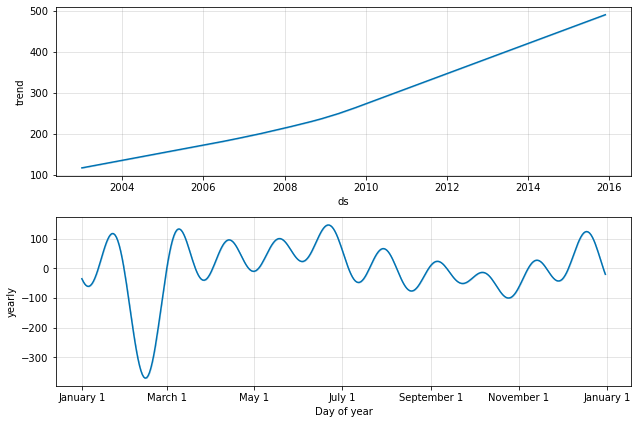

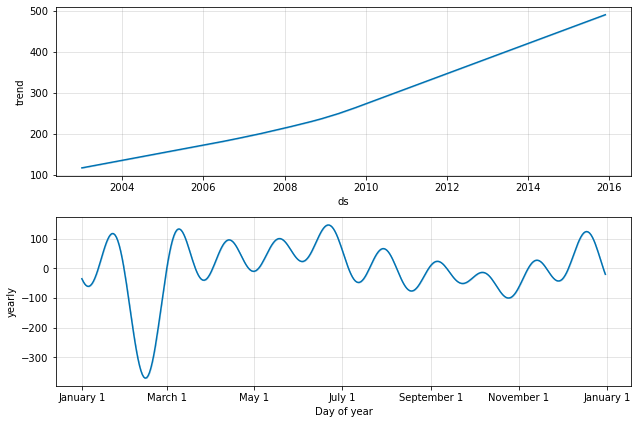

In [6]:
#Prophet has built in plotting mechanism
model.plot_components(forecast)

### Plotting the original and the predcited

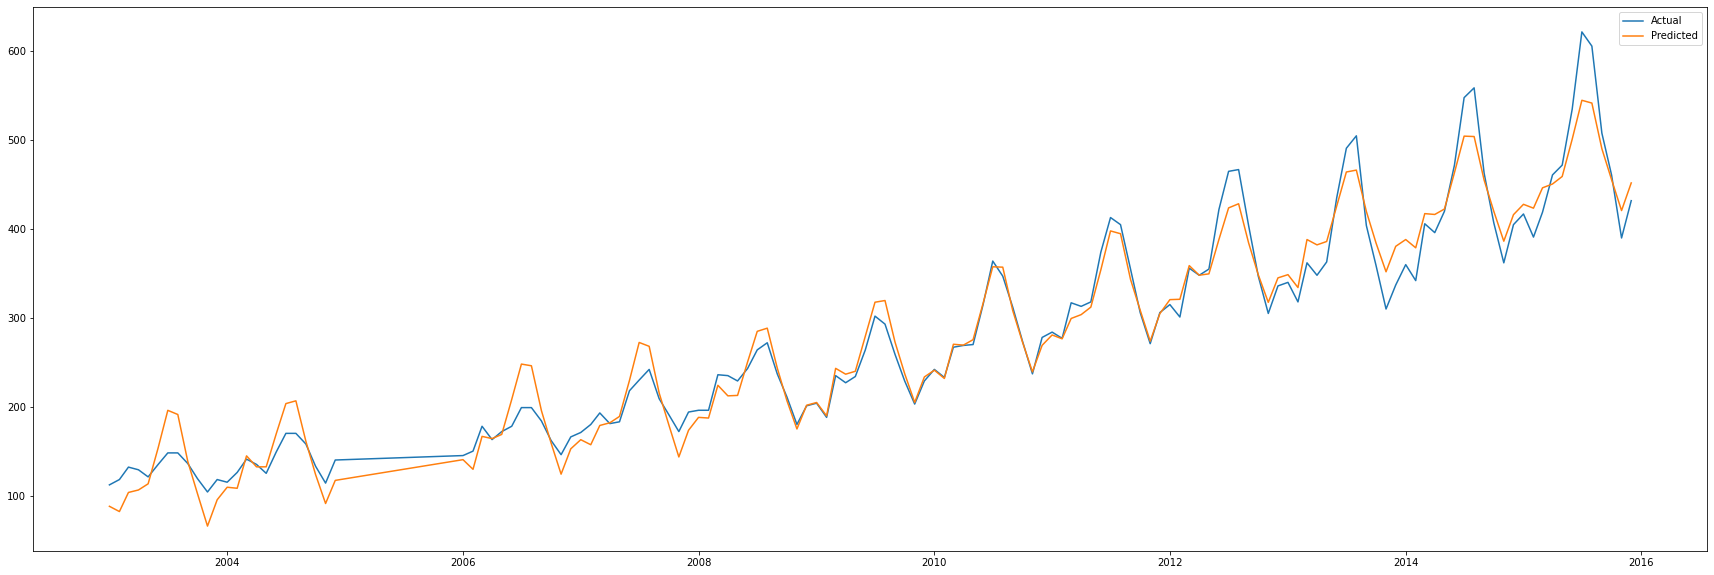

RMSE: 22.068


In [7]:
#Plotting the original and the predcited
plt.figure(figsize=(30,10))
plt.plot(df.ds,df.y,Label='Actual')
plt.plot(forecast.ds,forecast.yhat,Label='Predicted')
plt.legend()
plt.show()
# report performance
mse = mean_squared_error(df.y, forecast.yhat)
rmse = np.sqrt(mse)
print('RMSE: %.3f' % rmse)

We got an RMSE of 22 with out any smoothing or differensing.. Awsome right ?

### Trying out walk forward validation

In [8]:
X=df.copy()
#We can split the data to train & split on a pecentage basis as below.
#Splitting for train (70%) & Test (30%)
train_size = int(len(X) * 0.70)
train, test = X[0:train_size], X[train_size:]

# walk-forward validation
history = train
predictions = pd.DataFrame(columns=('ds','yhat'))

for i in range(len(test)):
    # predict
    model = Prophet()
    model_fit = model.fit(history) # Prophet fitting model for the so far hitory
    forecast = model_fit.predict(test.iloc[[i]]) # Prophet prediction for one test entry
    yhat = forecast[['ds','yhat']].head(1) # Taking the first row even though it has only one row.
    yhat = yhat.reset_index(drop=True) # Resetting index so that we can take iloc later properly
    predictions = predictions.append(yhat).reset_index(drop=True) # Resetting index so that we can take iloc later properly
    # observation
    obs = test.iloc[i]
    history = history.append(obs).reset_index(drop=True) # Resetting index so that we can take iloc later properly
    print('> Date/Time=',yhat.ds[0],' Predicted=%.3f, Expected=%3.f' % (yhat.yhat[0], obs.y))
# report performance
mse = mean_squared_error(test.y, predictions.yhat)
rmse = np.sqrt(mse)
print('RMSE: %.3f' % rmse)

> Date/Time= 2012-05-01 00:00:00  Predicted=351.888, Expected=355
> Date/Time= 2012-06-01 00:00:00  Predicted=375.411, Expected=422
> Date/Time= 2012-07-01 00:00:00  Predicted=406.614, Expected=465
> Date/Time= 2012-08-01 00:00:00  Predicted=410.673, Expected=467
> Date/Time= 2012-09-01 00:00:00  Predicted=390.735, Expected=404
> Date/Time= 2012-10-01 00:00:00  Predicted=367.038, Expected=347
> Date/Time= 2012-11-01 00:00:00  Predicted=342.662, Expected=305
> Date/Time= 2012-12-01 00:00:00  Predicted=369.313, Expected=336
> Date/Time= 2013-01-01 00:00:00  Predicted=370.631, Expected=340
> Date/Time= 2013-02-01 00:00:00  Predicted=364.678, Expected=318
> Date/Time= 2013-03-01 00:00:00  Predicted=397.847, Expected=362
> Date/Time= 2013-04-01 00:00:00  Predicted=388.038, Expected=348
> Date/Time= 2013-05-01 00:00:00  Predicted=385.374, Expected=363
> Date/Time= 2013-06-01 00:00:00  Predicted=416.632, Expected=435
> Date/Time= 2013-07-01 00:00:00  Predicted=448.012, Expected=491
> Date/Tim

RMSE of 38.9 is not at all bad in Walk forward validation. Remember our persistance was 43 (See Explanatory Data Analysis notebook)

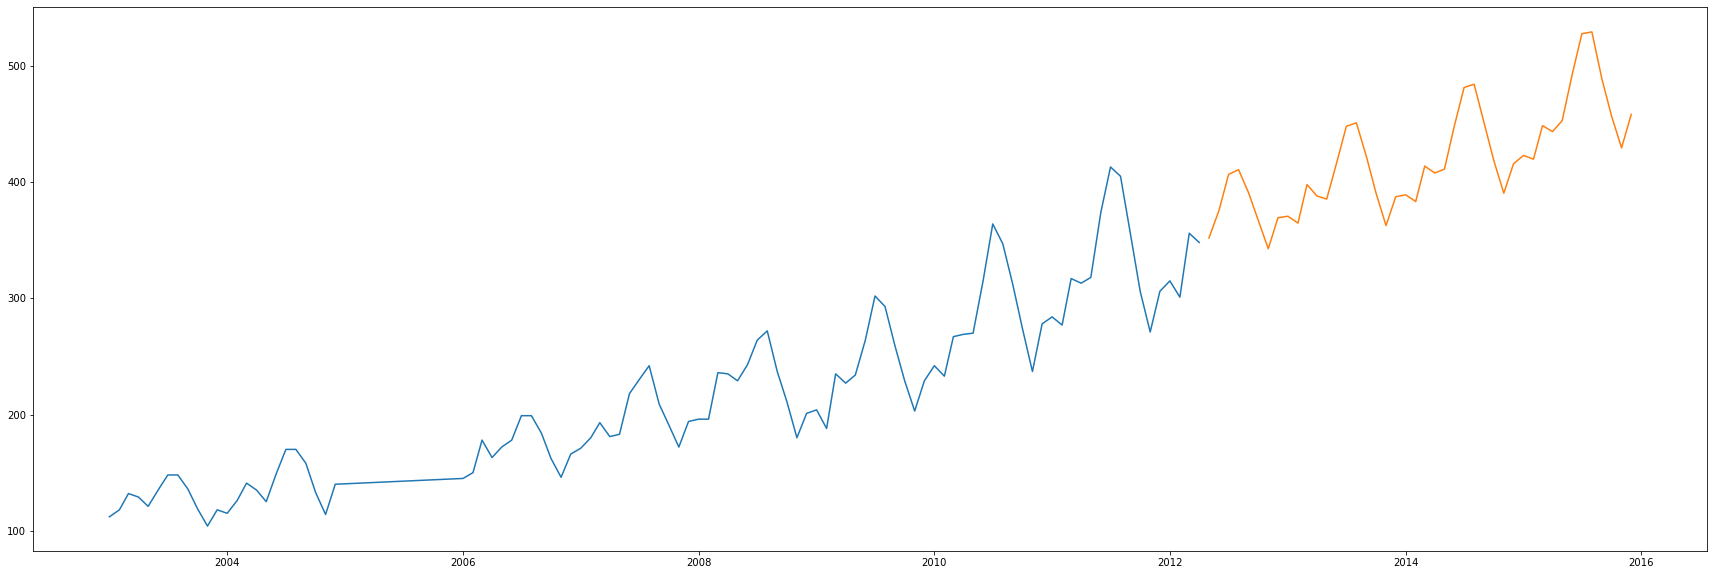

In [9]:
# Plotting the train & test predicted
plt.figure(figsize=(30,10))
plt.plot(train.ds,train.y)
plt.plot(predictions.ds,predictions.yhat)

In [10]:
predictions

,ds,yhat
0,2012-05-01,351.887517
1,2012-06-01,375.410798
2,2012-07-01,406.614074
3,2012-08-01,410.673125
4,2012-09-01,390.735364
5,2012-10-01,367.038237
6,2012-11-01,342.661862
7,2012-12-01,369.312995
8,2013-01-01,370.630615
9,2013-02-01,364.678388
